# Connectar una base de dades  MySQL desde Python

------


*Prof. Antoni Oliver Gelabert - Administracio de Sistemes Gestors de Bases de Dades (CIFP Pau Casesnoves, Curs 2022/2023)*

Modificat de la versio anterior

Prof. Antoni Oliver Gelabert - Sistemes de Gestio Empresarial (CIFP Pau Casesnoves, Curs 2021/2022)


-----------

1. Descarrega la BBDD al directori on tens aquest notebook i descomprimeix la carpeta sakila-db.zip

In [ ]:
!mysql -u root -p -e "Create database sakila;"
!mysql -u root -p sakila < sakila-db/sakila-schema.sql
!mysql -u root -p sakila < sakila-db/sakila-data.sql

2. Ara, importem la llibreria del connector python-mysql que hem instalat al pas 1. Aprofitem per connectar amb la base de dades sakila, que ja ha estat importada al pas anterior.

In [6]:
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="",
  database="sakila"
)

3. Salvam la consulta a la taula actors dins una llista anomenada myresult i amb un loop obtenim per pantalla les dades de la taula.

In [7]:
mycursor = mydb.cursor()
mycursor.execute("SELECT * FROM actor")
myresult = mycursor.fetchall()


In [8]:
for x in myresult:
    print(x)

(1, 'PENELOPE', 'GUINESS', datetime.datetime(2006, 2, 15, 4, 34, 33))
(2, 'NICK', 'WAHLBERG', datetime.datetime(2006, 2, 15, 4, 34, 33))
(3, 'ED', 'CHASE', datetime.datetime(2006, 2, 15, 4, 34, 33))
(4, 'JENNIFER', 'DAVIS', datetime.datetime(2006, 2, 15, 4, 34, 33))
(5, 'JOHNNY', 'LOLLOBRIGIDA', datetime.datetime(2006, 2, 15, 4, 34, 33))
(6, 'BETTE', 'NICHOLSON', datetime.datetime(2006, 2, 15, 4, 34, 33))
(7, 'GRACE', 'MOSTEL', datetime.datetime(2006, 2, 15, 4, 34, 33))
(8, 'MATTHEW', 'JOHANSSON', datetime.datetime(2006, 2, 15, 4, 34, 33))
(9, 'JOE', 'SWANK', datetime.datetime(2006, 2, 15, 4, 34, 33))
(10, 'CHRISTIAN', 'GABLE', datetime.datetime(2006, 2, 15, 4, 34, 33))
(11, 'ZERO', 'CAGE', datetime.datetime(2006, 2, 15, 4, 34, 33))
(12, 'KARL', 'BERRY', datetime.datetime(2006, 2, 15, 4, 34, 33))
(13, 'UMA', 'WOOD', datetime.datetime(2006, 2, 15, 4, 34, 33))
(14, 'VIVIEN', 'BERGEN', datetime.datetime(2006, 2, 15, 4, 34, 33))
(15, 'CUBA', 'OLIVIER', datetime.datetime(2006, 2, 15, 4, 34,

4. Mostram nomes les 10 primeres tuples-files-registres

In [9]:
myresult[:10]

[(1, 'PENELOPE', 'GUINESS', datetime.datetime(2006, 2, 15, 4, 34, 33)),
 (2, 'NICK', 'WAHLBERG', datetime.datetime(2006, 2, 15, 4, 34, 33)),
 (3, 'ED', 'CHASE', datetime.datetime(2006, 2, 15, 4, 34, 33)),
 (4, 'JENNIFER', 'DAVIS', datetime.datetime(2006, 2, 15, 4, 34, 33)),
 (5, 'JOHNNY', 'LOLLOBRIGIDA', datetime.datetime(2006, 2, 15, 4, 34, 33)),
 (6, 'BETTE', 'NICHOLSON', datetime.datetime(2006, 2, 15, 4, 34, 33)),
 (7, 'GRACE', 'MOSTEL', datetime.datetime(2006, 2, 15, 4, 34, 33)),
 (8, 'MATTHEW', 'JOHANSSON', datetime.datetime(2006, 2, 15, 4, 34, 33)),
 (9, 'JOE', 'SWANK', datetime.datetime(2006, 2, 15, 4, 34, 33)),
 (10, 'CHRISTIAN', 'GABLE', datetime.datetime(2006, 2, 15, 4, 34, 33))]

5. Mostrem nomes la tupla 1 (en realitat es la segona tupla, ja que python compta a partir del zero)

In [10]:
myresult[1]

(2, 'NICK', 'WAHLBERG', datetime.datetime(2006, 2, 15, 4, 34, 33))

6. Mostrem l'atribut 2 (en realitat es el 3r perque python sempre compta el 0 com a 1r. Per tant, cognom de l'actor) de la tupla 5

In [11]:
myresult[5][2]

'NICHOLSON'

7. Importam la llibreria Pandas com a pd i guardam el resultat obtingut en la consulta dins un Dataframe 

In [12]:
import pandas as pd
df =[]
df = pd.DataFrame(myresult, columns=['actor_id','first_name','last_name','timestamp'])

8. Obtenim les 5 primeres linies del dataframe:

In [13]:
df.head()

,actor_id,first_name,last_name,timestamp
0,1,PENELOPE,GUINESS,2006-02-15 04:34:33
1,2,NICK,WAHLBERG,2006-02-15 04:34:33
2,3,ED,CHASE,2006-02-15 04:34:33
3,4,JENNIFER,DAVIS,2006-02-15 04:34:33
4,5,JOHNNY,LOLLOBRIGIDA,2006-02-15 04:34:33


## Part II. Ara treballam amb la taula de pelicules, film.

9. Primer de tot importarem el nom de files de manera automatica i els guardarem dins labels a partir de la consulta "desc film" per obtenir el nom de les columnes

In [14]:
labels=[]
mycursor = mydb.cursor()
mycursor.execute("desc film")
myresult2 = mycursor.fetchall()
for x in myresult2:
    print(x[0])
    labels.append(x[0])

film_id
title
description
release_year
language_id
original_language_id
rental_duration
rental_rate
length
replacement_cost
rating
special_features
last_update


10. Ara, definim el dataframe de pelicules aprofitant la informacio salvada en labels per ja assignar automaticament la fila de noms de columnes a les dades. Tambe salvam la consulta sobre la taula de pelicules (films)

In [15]:
mycursor = mydb.cursor()
mycursor.execute("SELECT * FROM film")
myresult = mycursor.fetchall()
df = pd.DataFrame(myresult, columns=labels)

11. Observem les 5 primeres tuples del resutlat del DATAFRAME amb l'instruccio head

In [16]:
df.head()

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"{Deleted Scenes, Behind the Scenes}",2006-02-15 05:03:42
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,None,3,4.99,48,12.99,G,"{Trailers, Deleted Scenes}",2006-02-15 05:03:42
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,None,7,2.99,50,18.99,NC-17,"{Trailers, Deleted Scenes}",2006-02-15 05:03:42
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,None,5,2.99,117,26.99,G,"{Commentaries, Behind the Scenes}",2006-02-15 05:03:42
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,None,6,2.99,130,22.99,G,{Deleted Scenes},2006-02-15 05:03:42


12. Obtinguem una estadistica de la durada de les pelicules dins la base de dades sakila

In [17]:
df['length'].describe()

count    1000.000000
mean      115.272000
std        40.426332
min        46.000000
25%        80.000000
50%       114.000000
75%       149.250000
max       185.000000
Name: length, dtype: float64

13. Podem veure que els resultats indiquen una mitjana de 115 minuts de durada per unes 1000 pelicules. La desviacio tipica es de 40 minuts i la durada va entre els 46 minuts i els 185 minuts com a maxim.

14. Anem a veure mes detalls d'aquesta distribucio generant un histograma. Primer de tot importem matplotlib. Fer un histograma es tan simple com aixo:

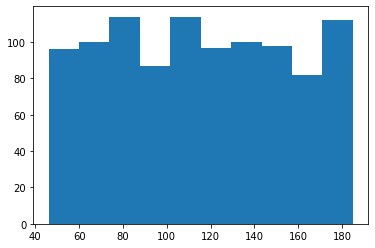

In [18]:
import matplotlib.pyplot as plt
plt.hist(df['length']);

15. No obstant aixo, si volem caracteritzar el grafic amb titols als eixos, amb una amplada de les barres especifica diferent a la predeterminada, i a mes volem guardar el resultat en una figura dins el mateix directori d'aquest notebook, haurem de ser mes especifics:

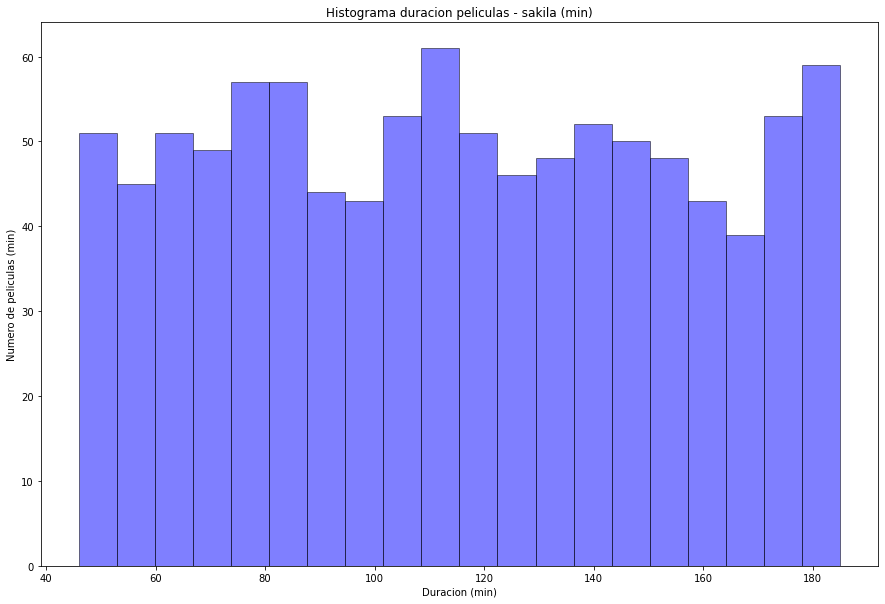

In [20]:
plt.figure(figsize=[15,10])
plt.title('Histograma duracion peliculas - sakila (min)') 
plt.xlabel('Duracion (min)')
plt.ylabel('Numero de peliculas (min)')
plt.hist(df['length'],bins=20,facecolor='blue', alpha=0.5, edgecolor = 'black')
plt.savefig("histograma_duracion_peliculas_sakila.png",dpi=200)

#### Mes opcions:
https://www.datacamp.com/community/tutorials/histograms-matplotlib

Tutorial W3 sobre el maneig de SQL a traves de Python

https://www.w3schools.com/python/python_mysql_getstarted.asp 

16. Ara, prova de fer els seguents exercicis al mateix notebook 

+ Descobreix quantes categories de pel·lícules hi ha i quines son. Posa la sentencia SQL.
+ Dibuixa un histograma del nombre de pel·lícules per cada categoria.
+ Dibuixa un histograma dels pagaments fets. Empra un violin plot o un box plot.
+ Quants Clients no estan en actiu? 
+ Quants actors hi ha en total?

https://www.w3schools.com/python/matplotlib_histograms.asp 
https://matplotlib.org/stable/gallery/index.html